# Phạm Thị Bích Nga - MSSV : 20521642 - Lớp : CS116.N11.KHCL
### Bài tập : Trực quan hóa dữ liệu bản đồ

Bước 1: Cài đặt geopandas và folium

Bước 2: git clone https://github.com/CityScope/CSL_HCMC

Bước 3: dùng geopandas để đọc shapefile trong /Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp

Bước 4: hãy thực hiện vẽ ranh giới các quận lên bản đồ dựa theo hướng dẫn sau:
https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html

In [ ]:
# Bước 1: Cài đặt geopandas và folium
!pip install geopandas 
!pip install folium

In [ ]:
# Bước 2: git clone https://github.com/CityScope/CSL_HCMC
!git clone https://github.com/CityScope/CSL_HCMC.git

In [3]:
# Plotting polygons with Folium
import geopandas as gpd
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [4]:
# Bước 3: dùng geopandas để đọc shapefile
# Load geometries
df = gpd.read_file('CSL_HCMC//Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')
df
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Dist_Name   24 non-null     object  
 1   Dist_ID     24 non-null     object  
 2   Level       24 non-null     object  
 3   Pop_2009    24 non-null     float64 
 4   Pop_2010    24 non-null     float64 
 5   Pop_2011    24 non-null     float64 
 6   Pop_2012    24 non-null     float64 
 7   Pop_2013    24 non-null     float64 
 8   Pop_2014    24 non-null     float64 
 9   Pop_2015    24 non-null     float64 
 10  Pop_2016    24 non-null     float64 
 11  Pop_2017    24 non-null     float64 
 12  Pop_2019    24 non-null     float64 
 13  Den_2009    24 non-null     float64 
 14  Den_2010    24 non-null     float64 
 15  Den_2011    24 non-null     float64 
 16  Den_2012    24 non-null     float64 
 17  Den_2013    24 non-null     float64 
 18  Den_2014    24 non-null     float64 
 19  De

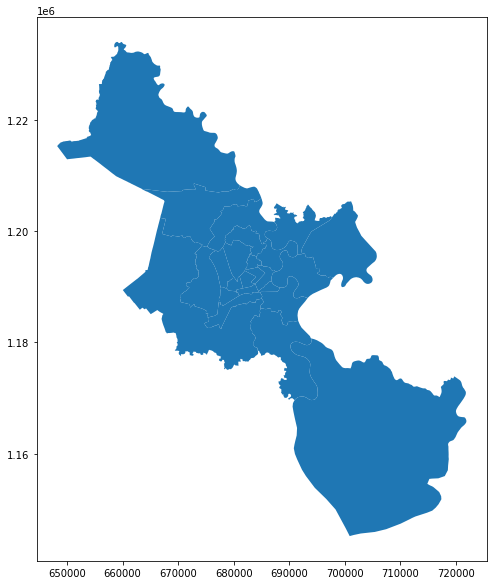

In [5]:
# Plot from the original dataset
df.plot(figsize=(10, 10))
plt.show()

In [6]:
# view the coordinate reference system of the geometry column
df.crs

<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# As folium (i.e. leaflet.js) by default accepts values of latitude and longitude (angular units) as input
# we need to project the geometry to a geographic coordinate system first.
# Use WGS 84 (epsg:4326) as the geographic coordinate system
df = df.to_crs(epsg=4326)
print(df.crs)
df

epsg:4326


,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,...,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((106.66909 10.75992, 106.66888 10.759..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,...,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((106.65855 10.76900, 106.65885 10.767..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,...,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((106.67277 10.81412, 106.67361 10.813..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,...,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((106.64909 10.83662, 106.65187 10.836..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,...,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((106.69197 10.80032, 106.69198 10.800..."


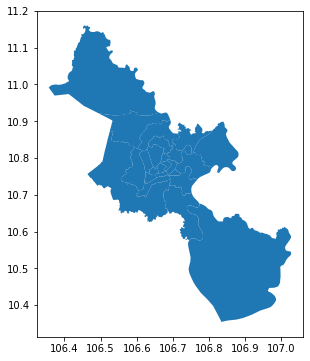

In [8]:
df.plot(figsize=(6, 6))
plt.show()

In [9]:
#Create Folium map
m = folium.Map(location=[11.5, 107.0], zoom_start=10, tiles='CartoDB positron')
#m = folium.Map(location=[11.5, 107.0], zoom_start=10, tiles='OpenStreetMap')
m

In [10]:
# Add polygons to map
for _, r in df.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'green'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [11]:
# Add centroid markers
# we need to project the data to a projected coordinate system to calculate centroids 
# Project to NAD83 projected crs
df = df.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
df['centroid'] = df.centroid

In [12]:
# add new geometry to Folium map, we need to project the geometry back to a geographic coordinate system with latitude and longitude values.
# Project to WGS84 geographic crs

# geometry (active) column
df = df.to_crs(epsg=4326)

# Centroid column
df['centroid'] = df['centroid'].to_crs(epsg=4326)

df.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,centroid
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795...",POINT (106.69713 10.77622)
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792...",POINT (106.68283 10.78144)
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752...",POINT (106.70549 10.75845)
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735...",POINT (106.63519 10.74585)
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758...",POINT (106.72941 10.73640)


In [13]:
for _, r in df.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)

m